<a href="https://colab.research.google.com/github/mfaysoares/Simulador_Preco_Carros/blob/main/Preco_Automoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Regressão Linear para Previsão de Preço de Carros**
<hr style='border: 2px solid red;'>

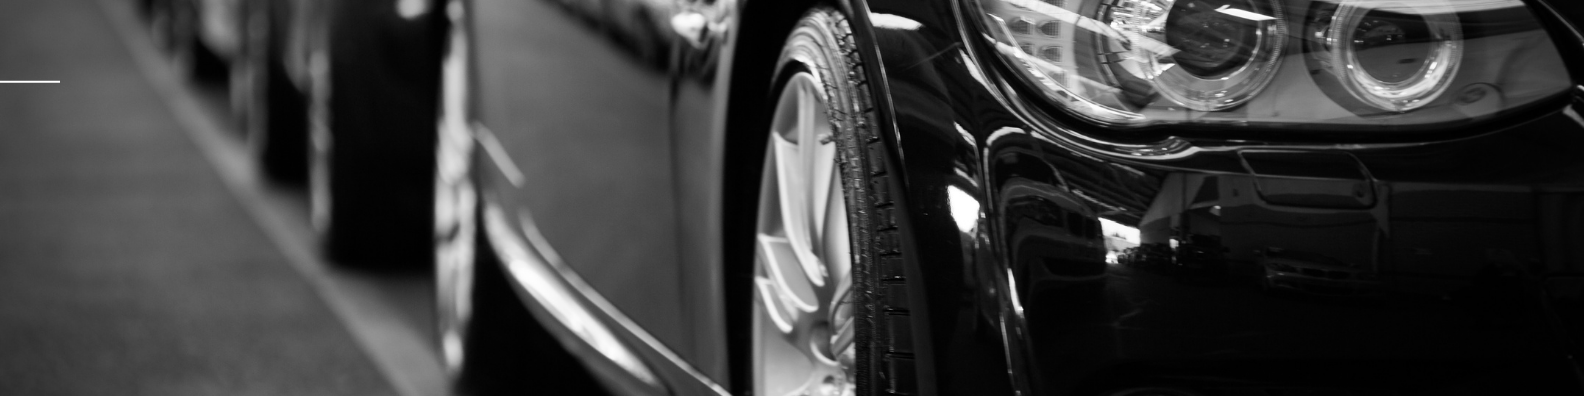

## Importando as bibliotecas

In [2]:
import pandas as pd
pd.set_option('max_columns',99)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Dataset

O dataset utilizado nesse projeto foi desenvolvido pelo Transfermarket e está disponível em https://www.kaggle.com/code/plaza11/linear-regression/data. No conjunto de dados são disponibilizados diversas informações a cerca de diferentes modelos de automóveis.


In [4]:
dataset = pd.read_csv('detalhes_carro.csv')

In [5]:
dataset.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


## **Análises Preliminares**
<hr style='border: 2px solid red;'>

#### **Estatísticas Descritivas:**


In [6]:
dataset = dataset[dataset['selling_price'] >= 100].reset_index(drop = True)

In [7]:
dataset.describe().round(2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


#### **Matriz de Correlação:**
Lembrando que o **coeficiente de correlação** é uma medida de associação linear entre duas variáveis e situa-se entre **-1 e +1** sendo que **-1** indica associação negativa perfeita e **+1** indica associação positiva perfeita.

In [8]:
dataset.corr().round(4)

,year,selling_price,km_driven,seats
year,1.0000,0.4141,-0.4180,-0.0091
selling_price,0.4141,1.0000,-0.2255,0.0414
km_driven,-0.4180,-0.2255,1.0000,0.2273
seats,-0.0091,0.0414,0.2273,1.0000


#### **Comportamento da Variável Dependente (Preço):**

In [9]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Preço de Venda de Automóveis')

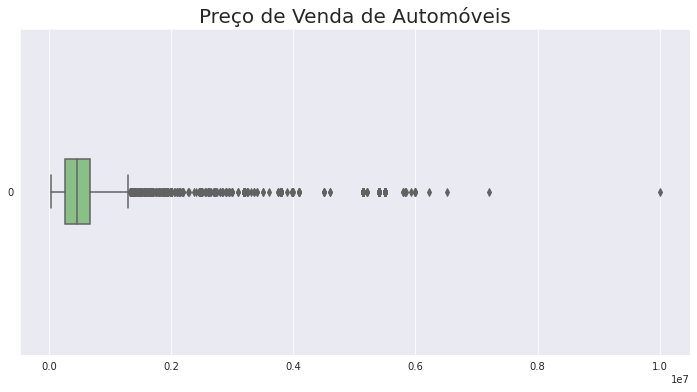

In [10]:
ax = sns.boxplot(data=dataset["selling_price"], 
                 orient = 'h',
                 width = 0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço de Venda de Automóveis', fontsize = 20)

#### **Distribuição de Frequências da Variável Dependente (Preço):**

Analisando a distribuição dos dados de nossa variável dependente, verificamos que a mesma apresenta uma assimetria. Nesse caso, será necessário fazer uma transformação para uma distribuição normal.

Text(0, 0.5, 'Preço de Venda')

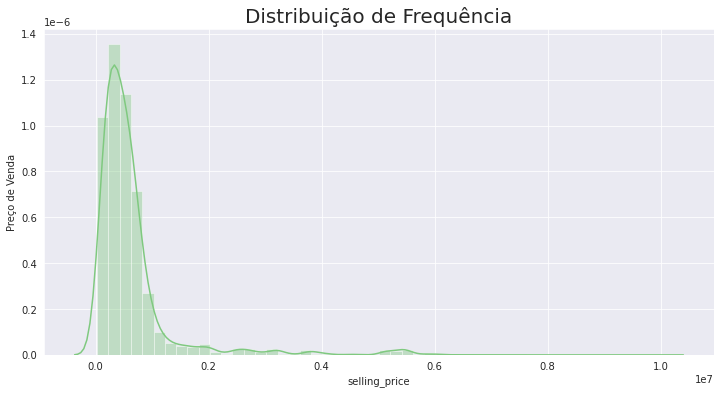

In [11]:
ax = sns.distplot(dataset['selling_price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize = 20)
ax.set_ylabel('Preço de Venda')

In [12]:
dataset_novo = dataset[dataset['selling_price'] <= 0.1*10000000]
dataset_novo = dataset_novo.fillna(0)

Text(0, 0.5, 'Preço de Venda')

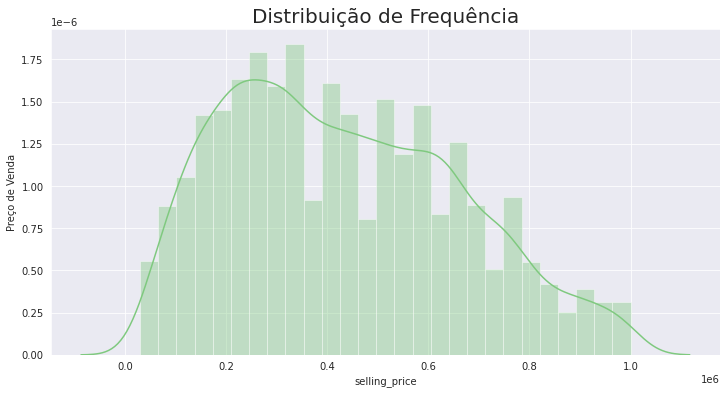

In [13]:
ax2 = sns.distplot(dataset_novo['selling_price'])
ax2.figure.set_size_inches(12, 6)
ax2.set_title('Distribuição de Frequência', fontsize = 20)
ax2.set_ylabel('Preço de Venda')

#### **Gráficos de Dispersão entre as Variáveis do Dataset:**

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

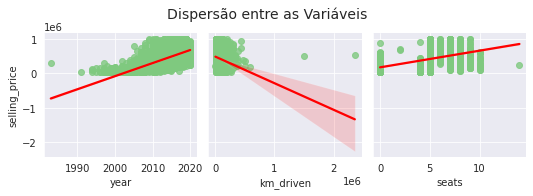

In [14]:
ax = sns.pairplot(dataset_novo,
                  y_vars = 'selling_price',
                  x_vars = ['year','km_driven',	'seats'],
                  kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 14, y = 1.05)

## **Estimando o Modelo de Regressão Linear:**
<hr style='border: 2px solid red;'>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
y = dataset_novo['selling_price']
y.head(3)

0    450000
1    370000
2    158000
Name: selling_price, dtype: int64

In [17]:
x = dataset_novo[['year','km_driven',	'seats']]
x.head(3)

,year,km_driven,seats
0,2014,145500,5.0
1,2014,120000,5.0
2,2006,140000,5.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [19]:
modelo = LinearRegression()

In [20]:
modelo.fit(X_train, y_train)

LinearRegression()

#### **Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO:**

In [21]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.47


#### **Gerando previsões para o modelo de treino:**

In [22]:
y_previsto_train = modelo.predict(X_train)


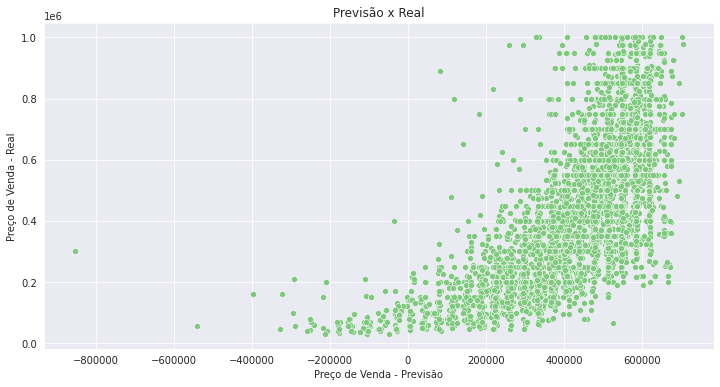

In [23]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real')
ax.set_xlabel('Preço de Venda - Previsão')
ax.set_ylabel('Preço de Venda - Real')
ax.grid(True)

In [24]:
residuo = y_train - y_previsto_train
residuo

2799   -300201.751310
109       8608.989056
2226    -85415.836606
1487     10465.137222
5529    -16381.631708
            ...      
2652    -86703.453723
5808   -135061.719872
7958    118822.270342
524    -111043.740957
2249    -60156.932502
Name: selling_price, Length: 5114, dtype: float64

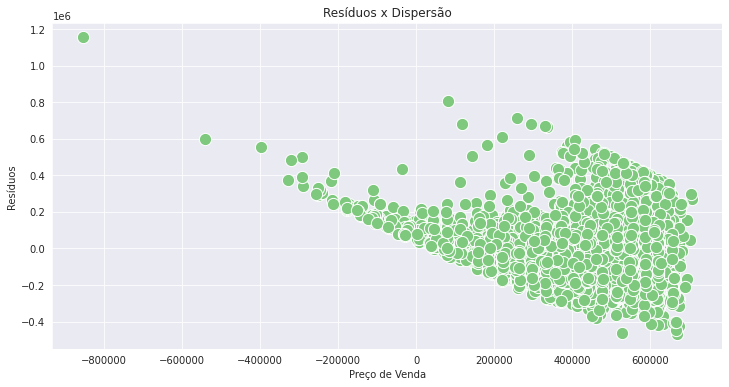

In [25]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s = 150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos x Dispersão')
ax.set_xlabel('Preço de Venda')
ax.set_ylabel('Resíduos')
ax.grid(True)

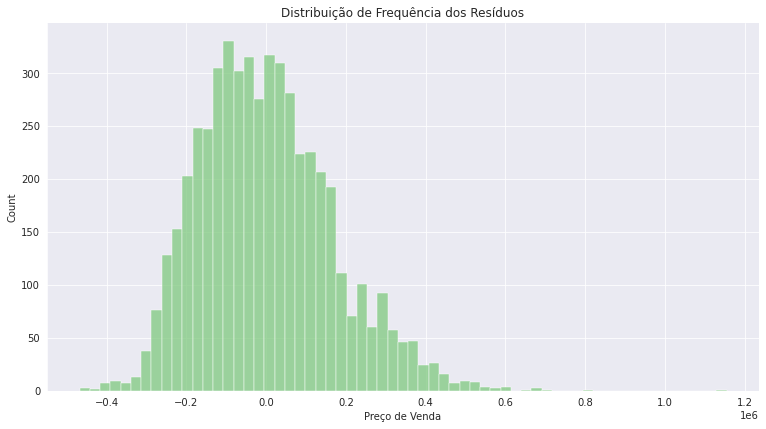

In [26]:
ax = sns.displot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set(title ="Distribuição de Frequência dos Resíduos", xlabel='Preço de Venda') 

## **Testando o Modelo:**
<hr style='border: 2px solid red;'>

In [27]:
entrada = X_test[0:1]
modelo.predict(entrada)[0]

477029.72222183645

## **Previsões Pontuais:**
<hr style='border: 2px solid red;'>

#### **Simulador de Preço:**
Criando um simulador que gere as estimativas de preço a partir de um conjunto de informações do automóvel.

In [28]:
def price_simulator(ano, km_dirigidos, assentos):
  entrada = [[ano, km_dirigidos, assentos]]
  preco = modelo.predict(entrada)[0]
  return preco.round(2)

ano = 2012
km_dirigidos = 23421
assentos = 4
price_simulator(ano, km_dirigidos, assentos)

333905.68